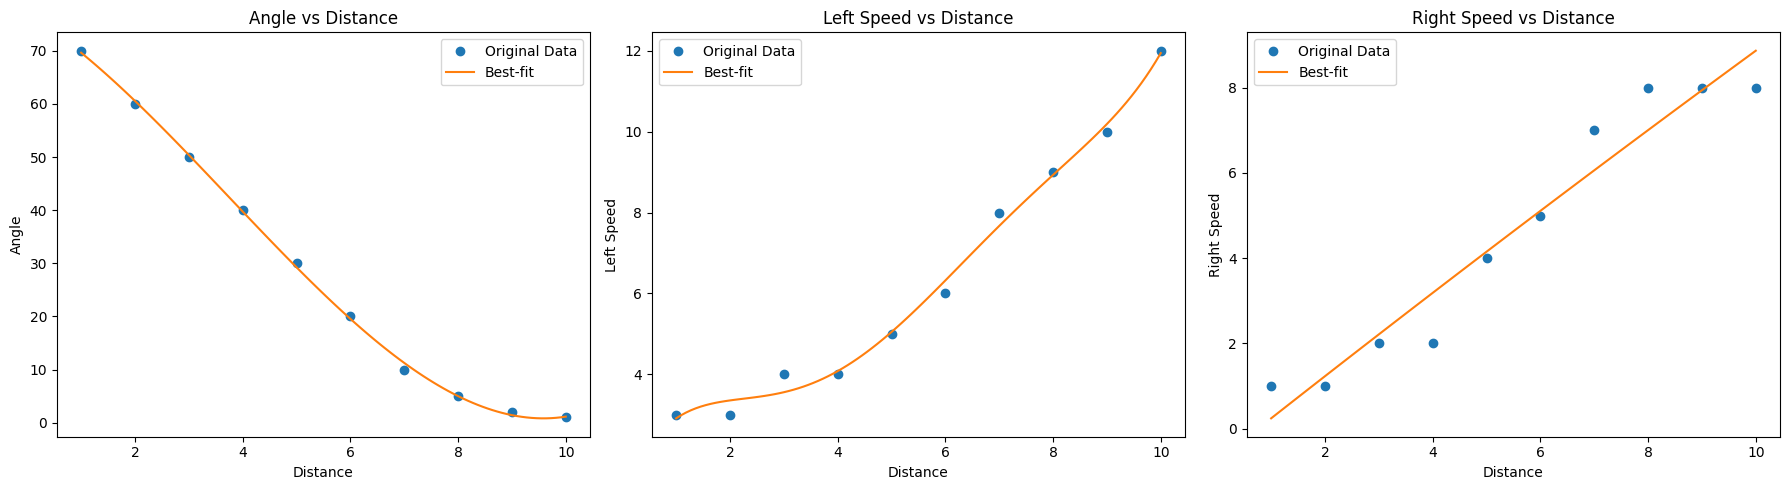

Angle vs Distance Polynomial Equation:		 y = 0.105x^3 + -1.178x^2 + -6.268x + 76.967
Left Speed vs Distance Polynomial Equation:	 y = 0.001x^5 + -0.039x^4 + 0.394x^3 + -1.629x^2 + 3.118x + 1.067
Right Speed vs Distance Polynomial Equation:	 y = -0.004x^2 + 0.999x + -0.750


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Example matrix with 10 rows of [distance, angle, left_speed, right_speed]
np.random.seed(0)  # For reproducible results
distance = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
angle = np.array([70, 60, 50, 40, 30, 20, 10, 5, 2, 1])
left_speed = np.array([3, 3, 4, 4, 5, 6, 8, 9, 10, 12])
right_speed = np.array([1, 1, 2, 2, 4, 5, 7, 8, 8, 8])

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

def plot_and_return_poly_equation(ax, x, y, degree, title, xlabel, ylabel):
    coeffs = np.polyfit(x, y, degree)
    poly = np.poly1d(coeffs)
    fit_x = np.linspace(min(x), max(x), 100)
    fit_y = poly(fit_x)

    ax.plot(x, y, 'o', label='Original Data')
    ax.plot(fit_x, fit_y, '-', label='Best-fit')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()

    # Generating polynomial equation string dynamically based on the degree
    poly_eq = "y = " + " + ".join([f"{coeff:.3f}x^{len(coeffs)-i-1}" if i < len(coeffs)-2 else (f"{coeff:.3f}x" if i == len(coeffs)-2 else f"{coeff:.3f}")
                                   for i, coeff in enumerate(coeffs)])
    # Correct formatting
    poly_eq = poly_eq.replace("x^1 ", "x ").replace("x^0", "").rstrip(" +")

    return poly_eq

# Angle
angle_eq = plot_and_return_poly_equation(axs[0], distance, angle, 3, 'Angle vs Distance', 'Distance', 'Angle')

# Left Speed
left_speed_eq = plot_and_return_poly_equation(axs[1], distance, left_speed, 5, 'Left Speed vs Distance', 'Distance', 'Left Speed')

# Right Speed
right_speed_eq = plot_and_return_poly_equation(axs[2], distance, right_speed, 2, 'Right Speed vs Distance', 'Distance', 'Right Speed')

plt.tight_layout()
plt.show()

# Print polynomial equations below
print(f"Angle vs Distance Polynomial Equation:\t\t {angle_eq}")
print(f"Left Speed vs Distance Polynomial Equation:\t {left_speed_eq}")
print(f"Right Speed vs Distance Polynomial Equation:\t {right_speed_eq}")
